In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
def get_err(y,X,W):
    err=0
    yhat=X.dot(W)
    for i in range(len(y)):
        err+=(np.argmax(y[i])!=np.argmax(yhat[i]))
    return err/len(y)

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X=train_X.astype(float)
test_X=test_X.astype(float)

In [4]:
N=10000
tr_l=np.zeros((N,10))
for i in range(N):
    tr_l[i][train_y[i]]=1

ts_l=np.zeros((N,10))
for i in range(N):
    ts_l[i][test_y[i]]=1

In [5]:
tr_data=train_X[:N].reshape([N,784])
ts_data=test_X.reshape([N,784])
beta=npl.svd(tr_data.T.dot(tr_data))[1][0]
mu=np.mean(tr_data,0)
tr_data2=tr_data-mu

beta2=npl.svd(tr_data2.T.dot(tr_data2))[1][0]
alpha=npl.svd(tr_data2.T.dot(tr_data2))[1][-1]
# For concating all ones, I am using beta-scaling rather than alpha for fast loss convergence. Does not affect classification error.
tr_data2=np.concatenate([tr_data2,np.sqrt(alpha)*np.ones((N,1))/np.sqrt(N)],1)
# For test data, subtract the same mean vector mu calculated during training
ts_data2=np.concatenate([ts_data-mu,np.sqrt(beta2)*np.ones((N,1))/np.sqrt(N)],1)
beta2=npl.svd(tr_data2.T.dot(tr_data2))[1][0]

In [6]:
print('Step size ratio (biased/debiased):',beta/beta2)

Step size ratio (biased/debiased): 7.156024453030929


In [7]:
W=np.zeros((784,10))
W2=np.zeros((785,10))
IT=100
loss=np.zeros((2,IT))
err=np.zeros((2,IT))
terr=np.zeros((2,IT))
for it in range(IT):
    W+=tr_data.T.dot(tr_l-tr_data.dot(W))/beta
    W2+=tr_data2.T.dot(tr_l-tr_data2.dot(W2))/beta2
    loss[0,it]=npl.norm(tr_l-tr_data.dot(W))**2
    loss[1,it]=npl.norm(tr_l-tr_data2.dot(W2))**2
    err[0,it]=get_err(tr_l,tr_data,W)
    err[1,it]=get_err(tr_l,tr_data2,W2)
    terr[0,it]=get_err(ts_l,ts_data,W)
    terr[1,it]=get_err(ts_l,ts_data2,W2)
loss/=len(tr_l)

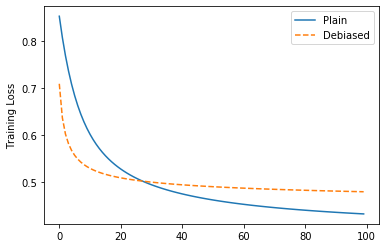

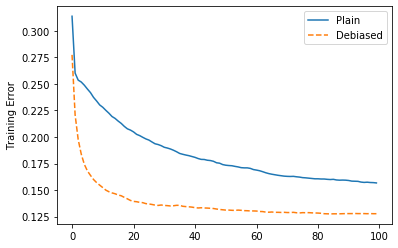

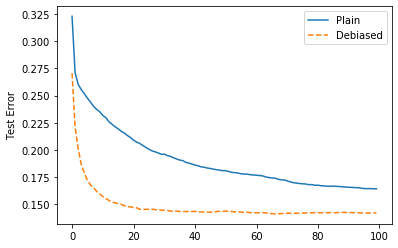

In [8]:
plt.plot(loss[0])
plt.plot(loss[1],'--')
plt.ylabel('Training Loss')
plt.legend(['Plain','Debiased'])
plt.figure()
plt.plot(err[0])
plt.plot(err[1],'--')
plt.ylabel('Training Error')
plt.legend(['Plain','Debiased'])
plt.figure()
plt.plot(terr[0])
plt.plot(terr[1],'--')
plt.ylabel('Test Error')
plt.legend(['Plain','Debiased'])